In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [368]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
df = pd.read_csv(url)

In [369]:
df = df.drop('show_id', axis=1)
df


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Pertama akan dilakukan eksplorasi pada fitur-fitur sederhana

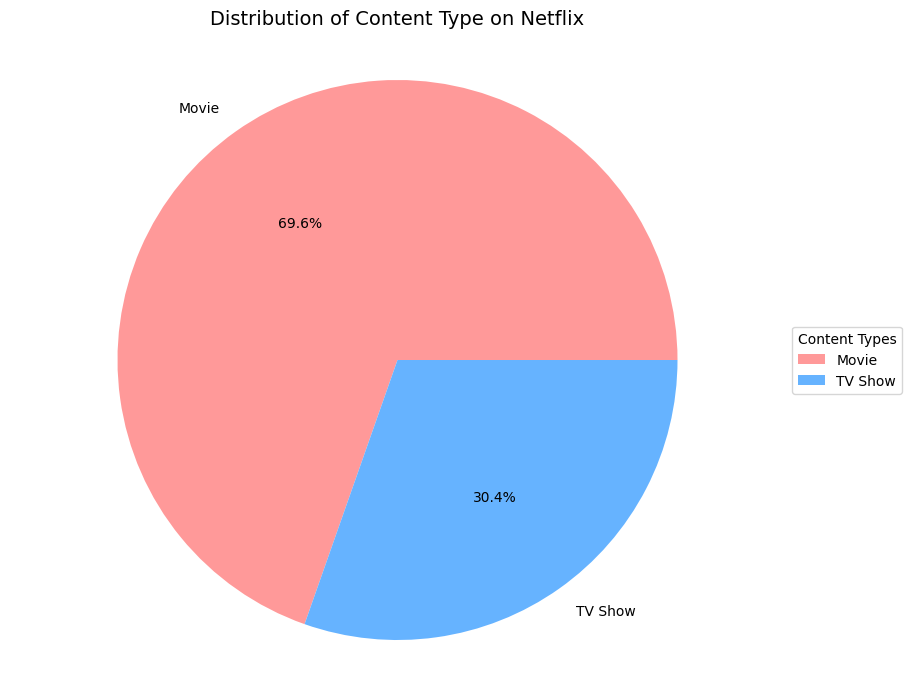

In [370]:
# type
type_counts = df['type'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff'],
        shadow=False)

plt.title('Distribution of Content Type on Netflix', pad=20, size=14)

plt.legend(title="Content Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()


#### Ada dua jenis tipe show, tipe Movie merupakan sebagian besar dengan 69.6%, sisanya TV Show.

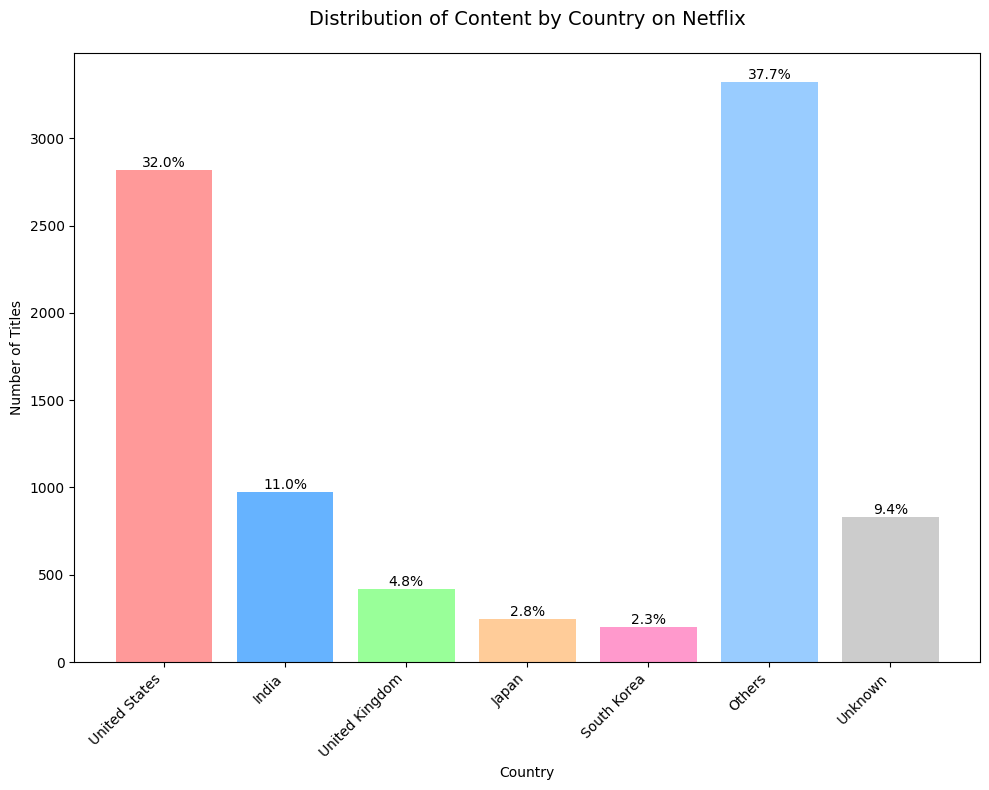

In [371]:
# country
country_counts = df['country'].value_counts()
top_5_countries = country_counts.head(5)
others = pd.Series({'Others': country_counts[5:].sum()})
unknown = pd.Series({'Unknown': df['country'].isna().sum()})
country_data = pd.concat([top_5_countries, others, unknown])

plt.figure(figsize=(10, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff99cc','#99ccff', '#cccccc']

bars = plt.bar(country_data.index, country_data.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{(height/country_data.sum())*100:.1f}%',
             ha='center', va='bottom')

plt.title('Distribution of Content by Country on Netflix', pad=20, size=14)
plt.xlabel('Country')
plt.ylabel('Number of Titles')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


#### Sebagian besar konten berasal dari negara United States dengan 35.3%. Tidak ada negara lain yang mencapai 13%. Negara urutan kedua India dengan 12.2%.

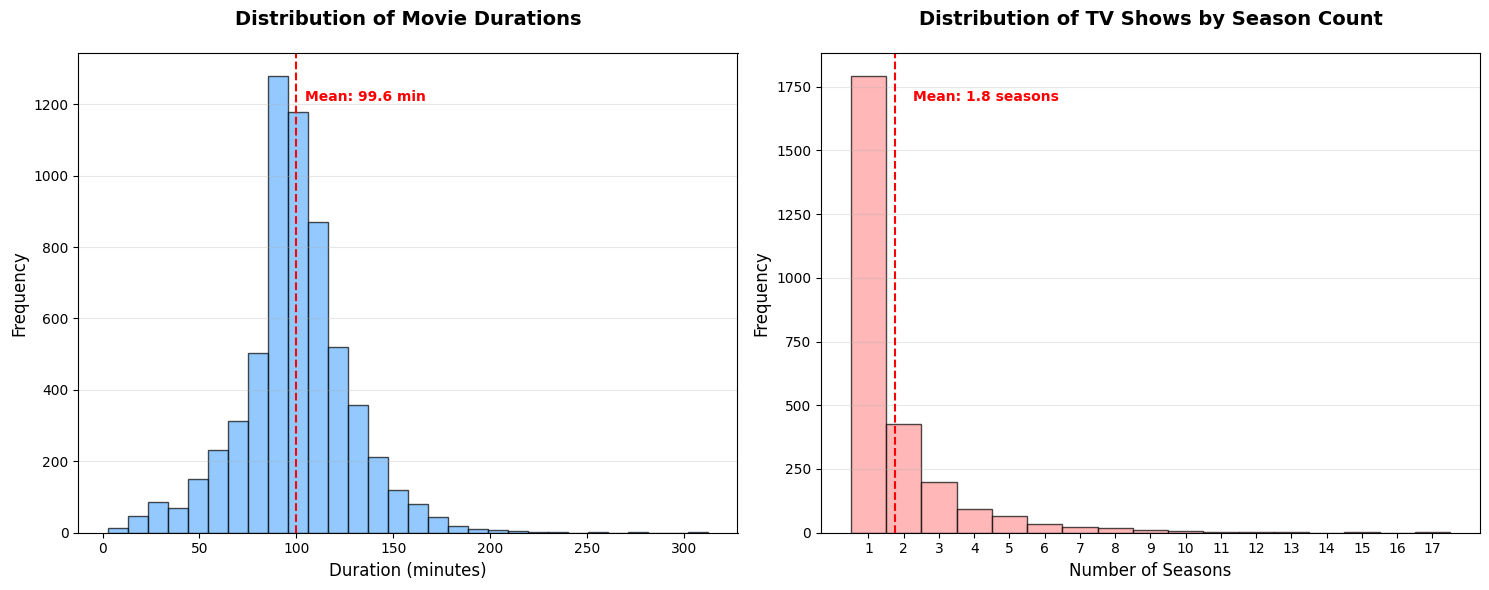

In [372]:
minutes_mask = df['duration'].str.contains('min', na=False)
seasons_mask = df['duration'].str.contains('Season', na=False)

minutes_data = df[minutes_mask]['duration'].str.extract(r'(\d+)').astype(float)
seasons_data = df[seasons_mask]['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(minutes_data, bins=30, 
                           color='#66b3ff', 
                           edgecolor='black', 
                           alpha=0.7)

mean_minutes = minutes_data.mean()[0]
plt.axvline(mean_minutes, color='red', linestyle='dashed', linewidth=1.5)
plt.text(mean_minutes+5, plt.ylim()[1]*0.9, f'Mean: {mean_minutes:.1f} min', 
         color='red', fontweight='bold')

plt.title('Distribution of Movie Durations', pad=20, size=14, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
max_season = int(seasons_data.max().iloc[0])
n, bins, patches = plt.hist(seasons_data, bins=range(1, max_season + 2), 
                           color='#ff9999', 
                           edgecolor='black', 
                           align='left', 
                           alpha=0.7)

mean_seasons = seasons_data.mean()[0]
plt.axvline(mean_seasons, color='red', linestyle='dashed', linewidth=1.5)
plt.text(mean_seasons+0.5, plt.ylim()[1]*0.9, f'Mean: {mean_seasons:.1f} seasons', 
         color='red', fontweight='bold')

plt.title('Distribution of TV Shows by Season Count', pad=20, size=14, fontweight='bold')
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(1, max_season + 1))

plt.tight_layout()
plt.show()


#### Sebagian besar Movie durasinya di sekitar 100 menit dan TV Show durasinya 1-2 Season.

In [373]:
max_seasons = df[df['duration'].str.contains('Season', na=False)]['duration'].str.extract(r'(\d+)').astype(float).max().iloc[0]
max_seasons_show = df[df['duration'].str.contains(f'{int(max_seasons)} Season', na=False)]

print(f"The highest number of seasons is: {int(max_seasons)}")
print("Show details:")
print(max_seasons_show[['title', 'duration', 'type', 'description']].to_string())

The highest number of seasons is: 17
Show details:
              title    duration     type                                                                                                                                            description
548  Grey's Anatomy  17 Seasons  TV Show  Intern (and eventual resident) Meredith Grey finds herself caught up in personal and professional passions with fellow doctors at a Seattle hospital.


In [374]:
max_minutes = df[df['duration'].str.contains('min', na=False)]['duration'].str.extract(r'(\d+)').astype(float).max().iloc[0]
max_minutes_show = df[df['duration'].str.contains(f'{int(max_minutes)} min', na=False)]

print(f"The longest movie duration is: {int(max_minutes)} minutes")
print("Movie details:")
print(max_minutes_show[['title', 'duration', 'type', 'description']].to_string())

The longest movie duration is: 312 minutes
Movie details:
                           title duration   type                                                                                                                                             description
4253  Black Mirror: Bandersnatch  312 min  Movie  In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.


#### TV Show durasi paling lama sepanjang 17 Season, dan Movie durasi paling lama sepanjang 312 min

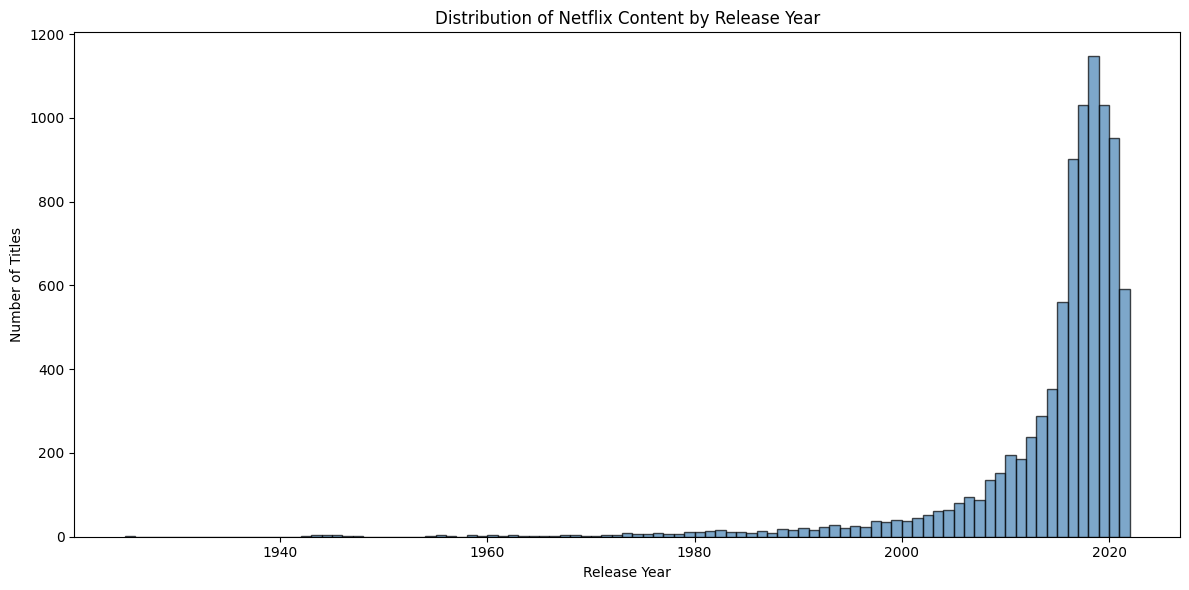

In [375]:
plt.figure(figsize=(12, 6))

plt.hist(df['release_year'], bins=range(int(df['release_year'].min()), int(df['release_year'].max()) + 2), 
         color='steelblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

plt.tight_layout()
plt.show()


#### Berdasarkan visualisasi di atas, Netflix paling banyak merilis konten sekitar sebelum 2020.

The year with the most Netflix content releases is: 2018 with 1147 titles


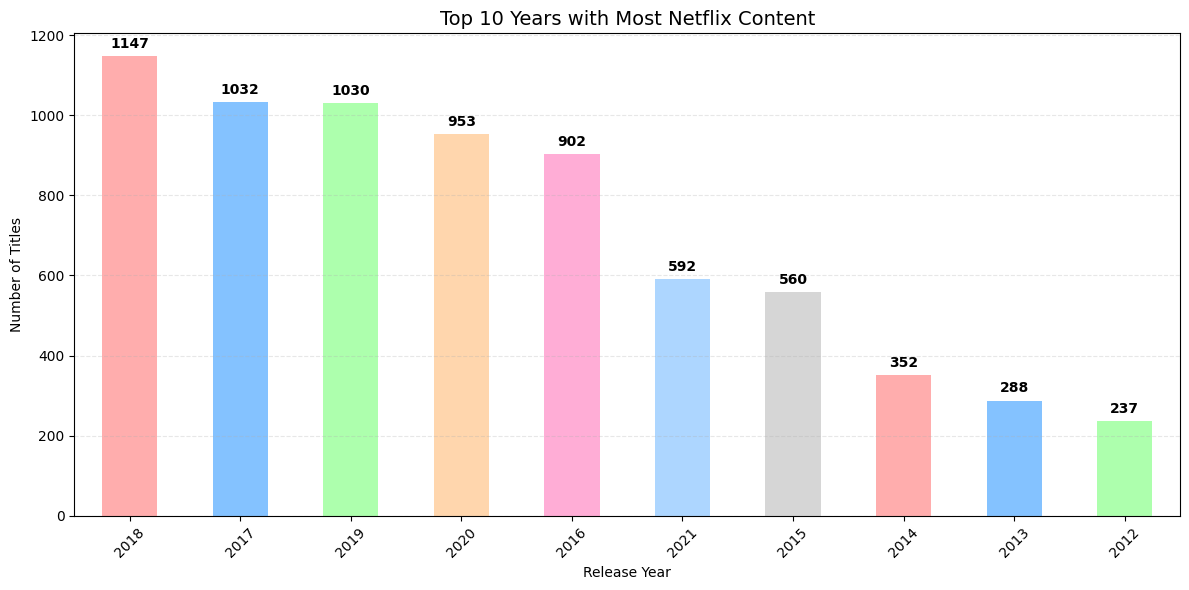

In [376]:
year_counts = df['release_year'].value_counts().sort_values(ascending=False)
most_common_year = year_counts.index[0]
count_most_common = year_counts.iloc[0]

print(f"The year with the most Netflix content releases is: {most_common_year} with {count_most_common} titles")

plt.figure(figsize=(12, 6))
top_10_years = year_counts.head(10)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff99cc','#99ccff', '#cccccc']
ax = top_10_years.plot(kind='bar', color=colors[:len(top_10_years)], edgecolor=None, alpha=0.8)

for i, v in enumerate(top_10_years):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold', color='black')

plt.title('Top 10 Years with Most Netflix Content', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


#### Berdasarkan visualiasi di atas, tahun dengan rilis terbanyak adalah 2018, lalu 2017

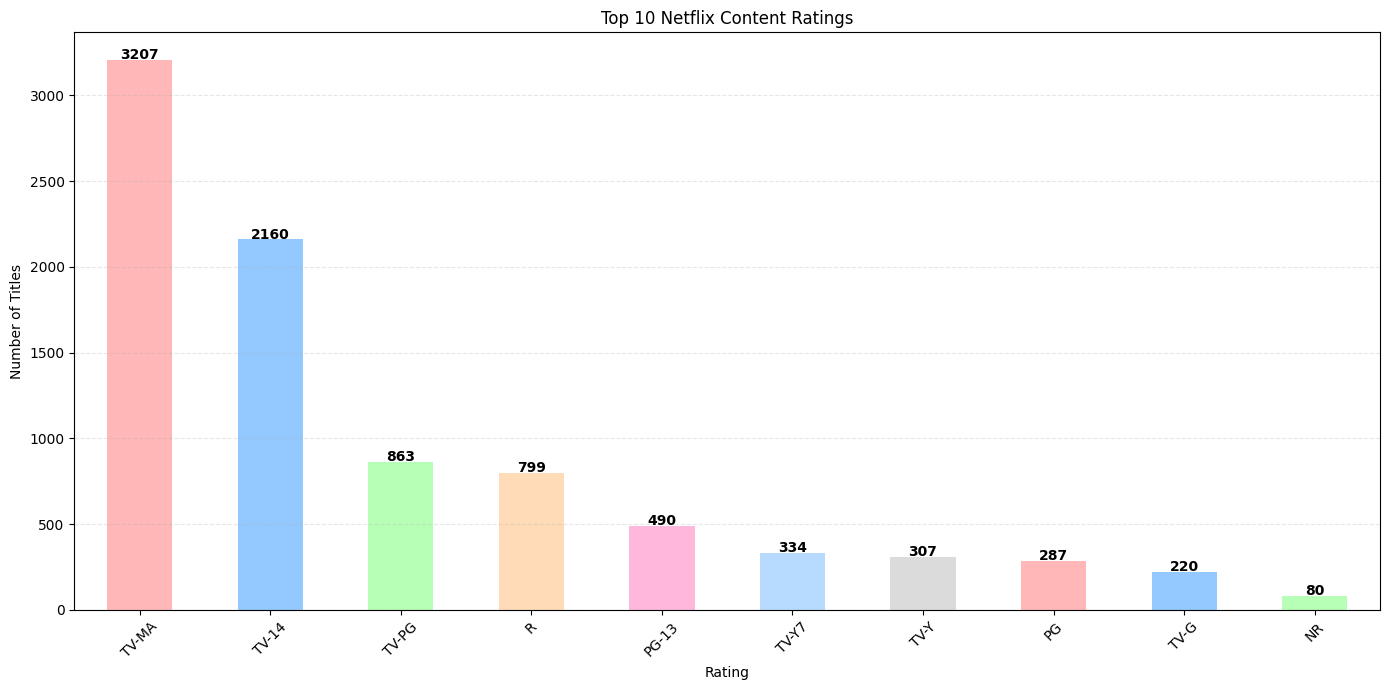

In [377]:
plt.figure(figsize=(14, 7))

rating_counts = df['rating'].value_counts().sort_values(ascending=False).head(10)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff99cc','#99ccff', '#cccccc']
ax = rating_counts.plot(kind='bar', color=colors[:len(rating_counts)], edgecolor=None, alpha=0.7)

for i, v in enumerate(rating_counts):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.title('Top 10 Netflix Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


#### Rating terbanyak adalah TV-MA

### Memisahkan kategori 'listed_in'

In [378]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [379]:
all_genres = []
for genres in df['listed_in'].str.split(', '):
    if isinstance(genres, list):
        all_genres.extend(genres)
unique_genres = sorted(list(set(all_genres)))

for genre in unique_genres:
    df[genre] = df['listed_in'].apply(lambda x: 'Yes' if isinstance(x, str) and genre in x else 'No')

print(f"Added {len(unique_genres)} new genre columns")
df.head()


Added 42 new genre columns


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,...,No,No,No,No,No,No,No,No,No,No
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,No,No,Yes,No,Yes,No,Yes,No,No,No
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,Yes,No,No,No,No,No,Yes,No,No,No
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",...,No,No,No,No,No,No,No,No,No,No
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,No,Yes,No,No,No,No,Yes,No,No,No


Top 15 Most Popular Genres:
Movies                      4502
Dramas                      3190
International Movies        2752
Comedies                    2255
TV Shows                    1755
International TV Shows      1351
Action & Adventure          1027
Documentaries                869
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Thrillers                    634
Romantic Movies              616
TV Comedies                  581
Crime TV Shows               470
dtype: int64


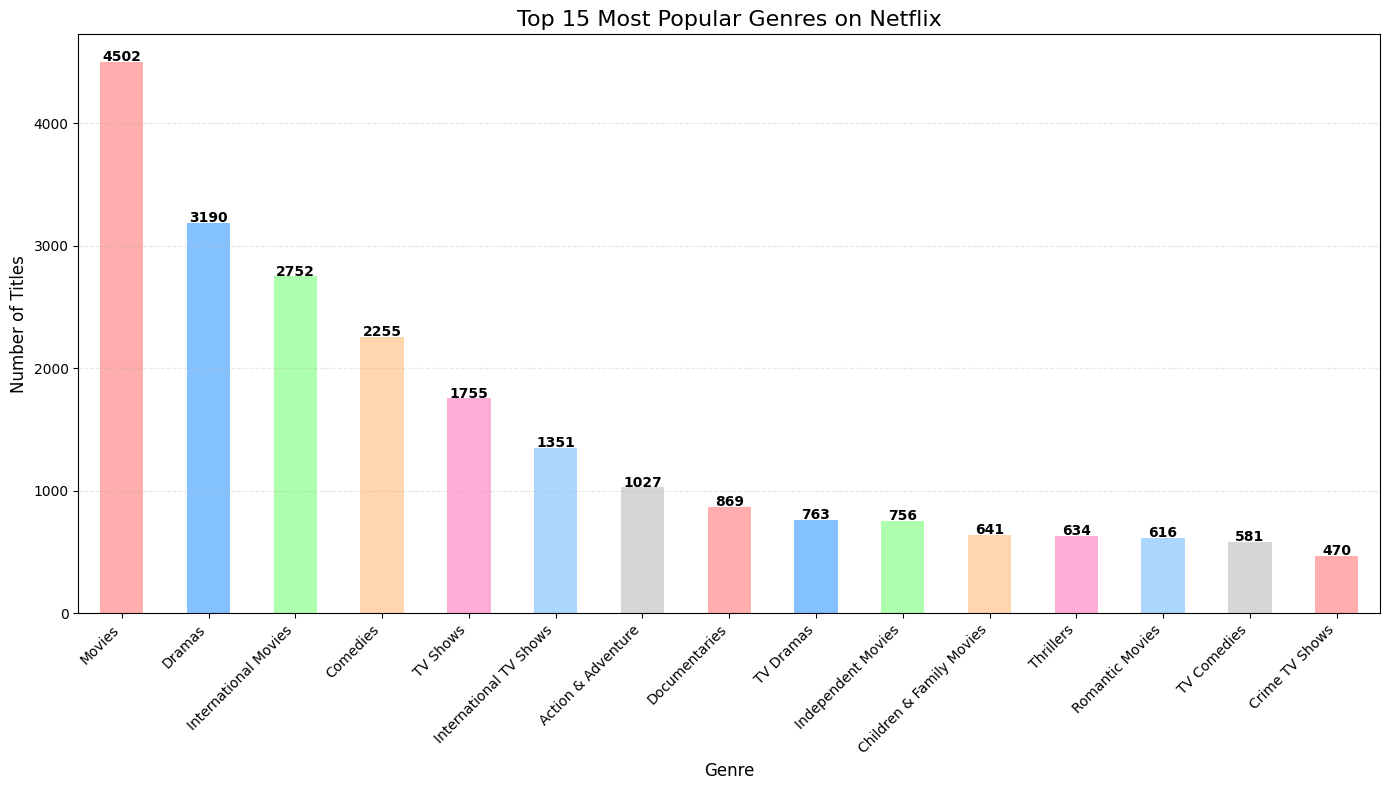

In [380]:
genre_counts = {}

for genre in unique_genres:
    genre_counts[genre] = (df[genre] == 'Yes').sum()

genre_series = pd.Series(genre_counts).sort_values(ascending=False)

top_genres = genre_series.head(15)
print("Top 15 Most Popular Genres:")
print(top_genres)

plt.figure(figsize=(14, 8))
ax = top_genres.plot(kind='bar', color=colors[:len(top_genres)], edgecolor=None, alpha=0.8)

for i, v in enumerate(top_genres):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.title('Top 15 Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### Kategori tertinggi selain tipe konten (Movie dan TV Show) adalah Dramas.

### Kesimpulan
- 1. Movie lebih banyak dibanding TV Show
- 2. Negara dengan rilis terbanyak adalah United States
- 3. Durasi kebanyakan di sekitar 100 menit untuk Movie, dan 1-2 Season untuk TV Show
- 4. Tahun dengan rilis terbanyak 2018
- 5. Rating terbanyak adalah TV-MA
- 6. Kategori dengan listing terbanyak (selain tipe konten) adalah Dramas